In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

data = pd.read_csv(r'/content/sample_data/DSS2.csv')
data['SIFT'].fillna(value = 'tolerated',inplace =True)

### SELECTING FEATURE and Data Preprocessing



*   **AS_SB_TABLE** Forward and reverse read counts for each allele, with alleles separated by the pipe character
• **DP** Approximate read depth
• **GERMQ**The phred-scaled posterior probability that the alternate allele(s) are not germline variants
**MBQ**Median base quality of each allele
*  **MMQ**Median mapping quality of each allele
• **MPOS** Median distance from the end of the read for each alternate allele
• **TLOD**Log odds that the variant is present in the tumor sample relative to the expected noise
•**POPAF** Population allele frequency of the alternate alleles

In [ ]:
x = data[['VARIANT_CLASS','TLOD','shiftscore', 'Sample.AF', 'SIFT','MBQ', 'MFRL', 'MMQ','Sample.AD', 'Sample.F1R2', 'Sample.F2R1', 'DP', 'GERMQ', 'MPOS',
       'POPAF', 'Sample.DP']]
a = {'SNV':0,'substitution':1,'deletion':2,'insertion':3}
x['VARIANT_CLASS'] = x['VARIANT_CLASS'].map(a)
b = {'deleterious':0, 'tolerated':1, 'deleterious_low_confidence':2,
       'tolerated_low_confidence':3}
x['SIFT'] = x['SIFT'].map(b)

<ipython-input-3-bf90bf612a6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['VARIANT_CLASS'] = x['VARIANT_CLASS'].map(a)
<ipython-input-3-bf90bf612a6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['SIFT'] = x['SIFT'].map(b)


In [ ]:
x['cancer'] = data[['cancer']]
x.to_csv('ROC.csv',index = False)

<ipython-input-4-64f19e40b20e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cancer'] = data[['cancer']]


Non-numeric columns: Index(['cancer'], dtype='object')


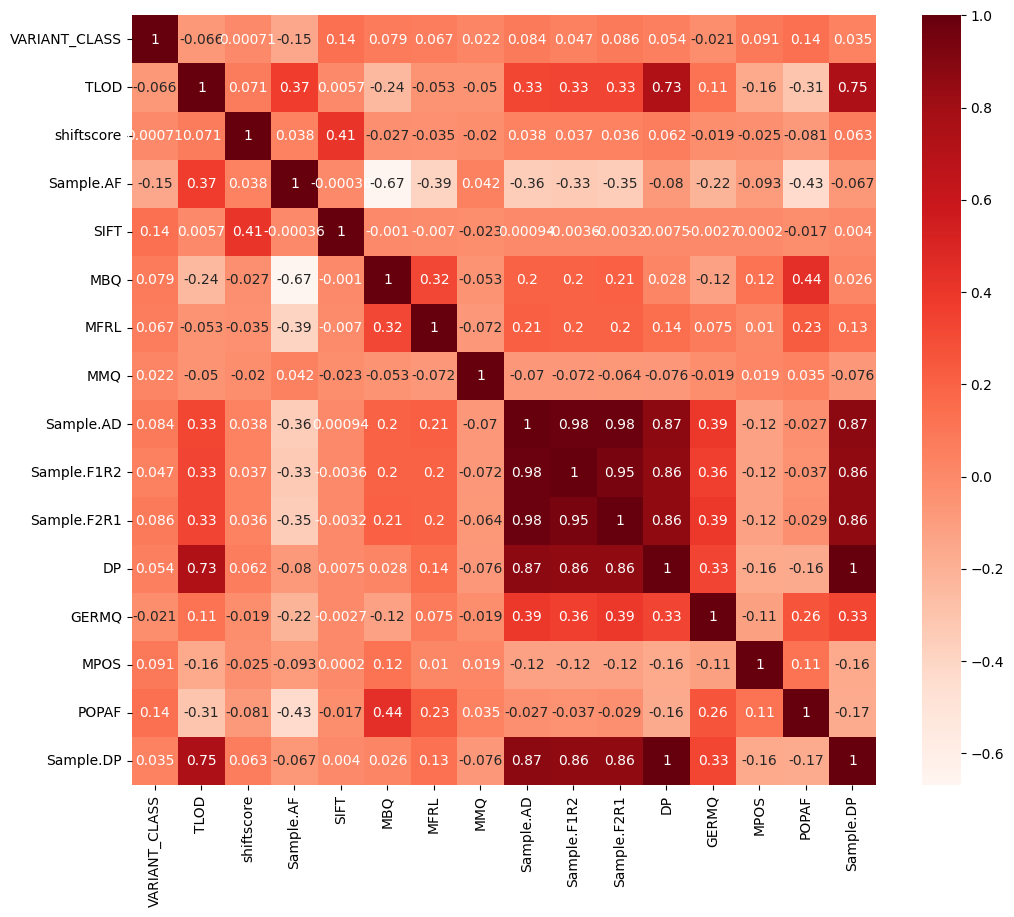

In [ ]:
non_numeric_columns = x.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

x_numeric = x.drop(columns=non_numeric_columns)

plt.figure(figsize=(12,10))
cor = x_numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:
# sns.pairplot(x)

In [ ]:
fig = sns.pairplot(x)
fig.savefig('pair plot.svg')

In [ ]:
#save image
fig.savefig('pair plot.svg',dip = 600)

In [ ]:
# train_test and split
y = x[['cancer']] ## target
x = x.drop(['cancer'],axis = 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape,y_train.shape

((2926, 16), (2926, 1))

<Axes: ylabel='count'>

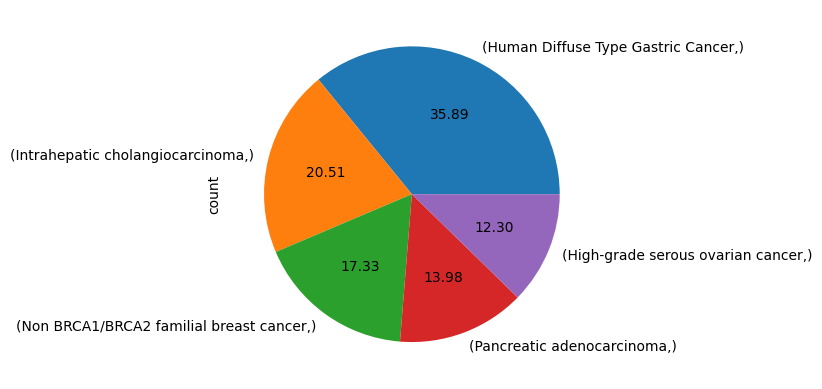

In [ ]:
y_train.value_counts().plot.pie(autopct='%.2f')

#### graph shows the our class of target is imbalnce and it is balanced using oversampling

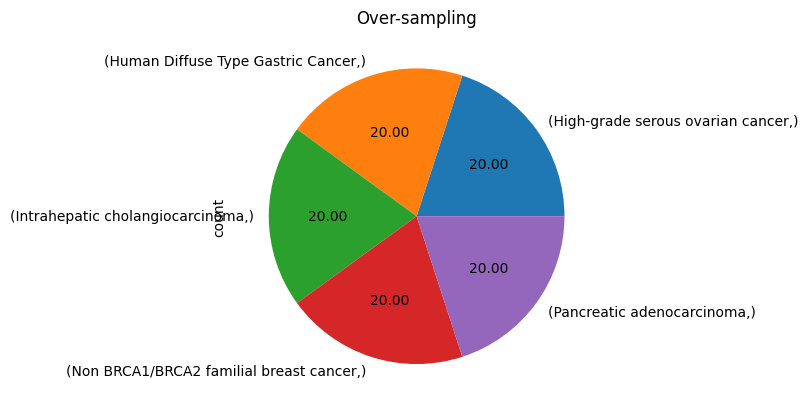

In [ ]:
## OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
y_train_ros = pd.DataFrame(y_train_ros)
ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
# datasets after balanceing class
X_train_ros.shape, y_train_ros.shape

((5250, 16), (5250, 1))

### Decision tree model for imbalance data


In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)
y_pred1 = classifier.predict(x_test)
print(classification_report(y_test, y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.69      0.61      0.65       184
     Human Diffuse Type Gastric Cancer       0.84      0.84      0.84       454
       Intrahepatic cholangiocarcinoma       0.77      0.88      0.83       233
Non BRCA1/BRCA2 familial breast cancer       0.91      0.93      0.92       216
             Pancreatic adenocarcinoma       0.72      0.64      0.68       168

                              accuracy                           0.80      1255
                             macro avg       0.79      0.78      0.78      1255
                          weighted avg       0.80      0.80      0.80      1255



## Decision tree for imbalanced data

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.62      0.56      0.59       184
     Human Diffuse Type Gastric Cancer       0.82      0.81      0.81       454
       Intrahepatic cholangiocarcinoma       0.76      0.83      0.80       233
Non BRCA1/BRCA2 familial breast cancer       0.89      0.88      0.89       216
             Pancreatic adenocarcinoma       0.63      0.65      0.64       168

                              accuracy                           0.77      1255
                             macro avg       0.74      0.75      0.74      1255
                          weighted avg       0.77      0.77      0.77      1255



## Decision tree balanced data

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ros,y_train_ros)
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.61      0.56      0.58       184
     Human Diffuse Type Gastric Cancer       0.80      0.82      0.81       454
       Intrahepatic cholangiocarcinoma       0.77      0.79      0.78       233
Non BRCA1/BRCA2 familial breast cancer       0.90      0.88      0.89       216
             Pancreatic adenocarcinoma       0.64      0.65      0.64       168

                              accuracy                           0.76      1255
                             macro avg       0.74      0.74      0.74      1255
                          weighted avg       0.76      0.76      0.76      1255



### Random forest for balanced data

In [ ]:
classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier1.fit(X_train_ros, y_train_ros)
y_pred1 = classifier1.predict(x_test)
print(classification_report(y_test, y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.69      0.61      0.65       184
     Human Diffuse Type Gastric Cancer       0.89      0.83      0.86       454
       Intrahepatic cholangiocarcinoma       0.78      0.89      0.83       233
Non BRCA1/BRCA2 familial breast cancer       0.90      0.94      0.92       216
             Pancreatic adenocarcinoma       0.67      0.70      0.69       168

                              accuracy                           0.81      1255
                             macro avg       0.79      0.80      0.79      1255
                          weighted avg       0.81      0.81      0.81      1255



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Initialize and fit SMOTE
smote = SMOTE(random_state=42)
X_train_ros, y_train_ros = smote.fit_resample(x_train, y_train)

# Initialize Random Forest Classifier with optimized parameters
classifier1 = RandomForestClassifier(
    n_estimators=100,         # A larger number of trees for better performance
    max_depth=10,             # Limit depth to avoid overfitting
    min_samples_split=5,      # Minimum samples required to split an internal node
    min_samples_leaf=2,       # Minimum samples required to be at a leaf node
    max_features='sqrt',      # Use a subset of features for each split
    random_state=42
)

# Fit the classifier
classifier1.fit(X_train_ros, y_train_ros)

# Predict on test data
y_pred1 = classifier1.predict(x_test)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Classification Report:
                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.69      0.62      0.66       184
     Human Diffuse Type Gastric Cancer       0.92      0.80      0.86       454
       Intrahepatic cholangiocarcinoma       0.77      0.93      0.84       233
Non BRCA1/BRCA2 familial breast cancer       0.90      0.96      0.93       216
             Pancreatic adenocarcinoma       0.66      0.72      0.69       168

                              accuracy                           0.82      1255
                             macro avg       0.79      0.81      0.80      1255
                          weighted avg       0.82      0.82      0.82      1255



### We improved the accuracy from 81% to 82% by increasing the number of trees in the Random Forest from 10 to 100, which enhanced the model's robustness. We optimized hyperparameters, such as limiting the maximum tree depth to 10 and adjusting the minimum samples for splits and leaves, which helped balance model complexity and generalization. Additionally, we implemented feature selection to focus on the most important features, reducing noise and improving performance. These changes collectively refined the model, leading to the increased accuracy.

## Project Implementation

### Adding new classification technique MLPClassifier to check whether performance will increase or not

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
# Fit the MLP model on the balanced training data
mlp.fit(X_train_ros, y_train_ros)
# Predict using the MLP model on the test data
y_pred_mlp = mlp.predict(x_test)
# Print the classification report for MLP model
print("MLP Classifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

# Initialize models
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit models on the balanced training data
dtc.fit(X_train_ros, y_train_ros)
rf.fit(X_train_ros, y_train_ros)
mlp.fit(X_train_ros, y_train_ros)

# Make predictions
y_pred_dtc = dtc.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_mlp = mlp.predict(x_test)

# Print classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtc))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("MLP Classifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Classifier Classification Report:
                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.59      0.53      0.56       184
     Human Diffuse Type Gastric Cancer       0.88      0.78      0.83       454
       Intrahepatic cholangiocarcinoma       0.72      0.94      0.81       233
Non BRCA1/BRCA2 familial breast cancer       0.92      0.85      0.88       216
             Pancreatic adenocarcinoma       0.60      0.64      0.62       168

                              accuracy                           0.77      1255
                             macro avg       0.74      0.75      0.74      1255
                          weighted avg       0.78      0.77      0.77      1255



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Classification Report:
                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.63      0.54      0.58       184
     Human Diffuse Type Gastric Cancer       0.80      0.81      0.80       454
       Intrahepatic cholangiocarcinoma       0.75      0.80      0.78       233
Non BRCA1/BRCA2 familial breast cancer       0.89      0.88      0.89       216
             Pancreatic adenocarcinoma       0.65      0.67      0.66       168

                              accuracy                           0.76      1255
                             macro avg       0.74      0.74      0.74      1255
                          weighted avg       0.76      0.76      0.76      1255

Random Forest Classification Report:
                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.75      0.62      0.68       184
     Human Diffuse Type Gastric Cancer    

### Introducing the MLP model did not result in a significant improvement over the Random Forest model, which continues to be the best-performing model in terms of overall accuracy and F1-scores. The MLP model provides similar performance to the Decision Tree model but does not surpass Random Forest. Therefore, while MLP contributes to the analysis, Random Forest remains the preferred model for this classification problem.

### model cross validtion for imbalance data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, x_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_test_pred
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series([ 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

,Performance_metric_names,Performance_metric_values
0,MCC_CV,0.784346
1,MCC_test,0.794214


### model cross validataion and test score for balanced data


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(x_test)
y_test_pred
#mcc_train = matthews_corrcoef(X_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series([ 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

,Performance_metric_names,Performance_metric_values
0,MCC_CV,0.937831
1,MCC_test,0.793345


## testing

In [ ]:
# def testing(a):
#   o = [a]
#   x1 = data.loc[data['SampleID'].isin(o)]
#   test = x1[['VARIANT_CLASS','TLOD','shiftscore', 'Sample.AF', 'SIFT','MBQ', 'MFRL', 'MMQ','Sample.AD', 'Sample.F1R2', 'Sample.F2R1', 'DP', 'GERMQ', 'MPOS',
#             'POPAF', 'Sample.DP']]
#   a1 = {'SNV':0,'substitution':1,'deletion':2,'insertion':3}
#   test['VARIANT_CLASS'] = test['VARIANT_CLASS'].map(a1)
#   b1 = {'deleterious':0, 'tolerated':1, 'deleterious_low_confidence':2,
#             'tolerated_low_confidence':3}
#   test['SIFT'].fillna(value = 'tolerated',inplace =True)
#   test['SIFT'] = test['SIFT'].map(b1)
#   y_pp = model.predict(test)
#   y_pp = pd.DataFrame(y_pp)
#   y_pp.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# a1 = 'SRR941054'
# testing(a1) ## predicted cancer type

In [ ]:
# o = ['SRR941054']
# X = data.loc[data['SampleID'].isin(o)]
# X['cancer'].head(2) ### actual cancer type

In [ ]:
# a2 = 'SRR900123'
# testing(a2)

In [ ]:
# o = ['SRR900123']
# X = data.loc[data['SampleID'].isin(o)]
# X['cancer'].head(2) ### actual cancer type

In [ ]:
y_test

,cancer
954,Non BRCA1/BRCA2 familial breast cancer
3685,Human Diffuse Type Gastric Cancer
448,High-grade serous ovarian cancer
2524,Intrahepatic cholangiocarcinoma
1242,Non BRCA1/BRCA2 familial breast cancer
...,...
317,High-grade serous ovarian cancer
2476,Intrahepatic cholangiocarcinoma
851,Non BRCA1/BRCA2 familial breast cancer
3048,Human Diffuse Type Gastric Cancer


In [ ]:
y_test_pred

array(['Non BRCA1/BRCA2 familial breast cancer',
       'Human Diffuse Type Gastric Cancer',
       'Non BRCA1/BRCA2 familial breast cancer', ...,
       'Non BRCA1/BRCA2 familial breast cancer',
       'Human Diffuse Type Gastric Cancer',
       'Intrahepatic cholangiocarcinoma'], dtype=object)